In [1]:
# Importing useful libraries
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data set vizualisation 


In [2]:
# Reading the dataset
filename = 'dataset.csv'
df = pd.read_csv(filename)
raw_data = df.values
df

,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,...,dur_pt_int_total,dur_pt_int_waiting,dur_pt_int_walking,pt_n_interchanges,dur_driving,cost_transit,cost_driving_total,cost_driving_fuel,cost_driving_con_charge,driving_traffic_percent
0,0,0,0,0,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.052222,1.5,0.14,0.14,0.0,0.111702
1,1,0,0,1,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.059444,1.5,0.15,0.15,0.0,0.112150
2,2,0,0,2,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.236667,1.5,0.79,0.79,0.0,0.203052
3,3,0,0,3,drive,HBO,Petrol_Car,full,1.0,1,...,0.000000,0.000000,0.000000,0,0.233333,1.5,0.78,0.78,0.0,0.160714
4,4,0,1,2,drive,HBO,Petrol_Car,dis,1.0,1,...,0.000000,0.000000,0.000000,0,0.229167,1.5,0.78,0.78,0.0,0.130909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,81081,17615,0,0,drive,HBO,Average_Car,full,1.0,3,...,0.216667,0.197222,0.019444,2,0.859722,4.3,2.48,2.48,0.0,0.402262
81082,81082,17615,0,2,drive,NHBO,Average_Car,full,1.0,3,...,0.183333,0.160278,0.023056,2,0.925833,4.3,2.53,2.53,0.0,0.503750
81083,81083,17615,0,3,drive,HBO,Average_Car,full,1.0,3,...,0.000000,0.000000,0.000000,0,0.112500,1.5,0.32,0.32,0.0,0.234568
81084,81084,17615,1,0,pt,HBW,Average_Car,full,1.0,3,...,0.250000,0.230556,0.019444,2,1.121944,4.4,12.88,2.38,10.5,0.760832


## Question 1

In [3]:
#Number of households
H = 17616  

#Number of persons
P= 31954

#Number of trips

T= 81086  

## Question 2


In [4]:
number_trips = df.groupby(["household_id", "person_n"])["trip_n"].count()
print(number_trips)

mean_number = number_trips[2].mean()
#mean_number = np.mean(number[2])

print(mean_number)

household_id  person_n
0             0           4
              1           2
              2           4
1             0           2
              1           2
                         ..
17612         0           1
17613         0           2
17614         0           1
17615         0           3
              1           2
Name: trip_n, Length: 31954, dtype: int64
3.0


## Question 3

In [5]:
groupstransport = df.groupby(["travel_mode"])["trip_n"].count()

total_sum=np.sum(groupstransport)
market_share_cycle=(groupstransport[0]/total_sum)*100
market_share_drive=(groupstransport[1]/total_sum)*100
market_share_pt=(groupstransport[2]/total_sum)*100
market_share_walk=(groupstransport[3]/total_sum)*100

print(market_share_cycle,market_share_drive,market_share_pt,market_share_walk)

2.9659867301383716 44.16052092839701 35.277359840169694 17.59613250129492


## Question 4 : Market share of men and women 

In [6]:
Gender = df.groupby(["female"])
men_women = Gender["travel_mode"].value_counts()/Gender.size()*100
print(men_women)

female  travel_mode
0       drive          44.179081
        pt             34.714554
        walk           16.678821
        cycle           4.427545
1       drive          44.143828
        pt             35.783556
        walk           18.421176
        cycle           1.651441
dtype: float64


## Question 5: Trip purpose where bike obtain highest market share

In [7]:
# Group the data by purpose
purposes = df.groupby('purpose')

# Calculate market shares
modes = purposes['travel_mode'].value_counts()
shares = modes / purposes.size() * 100

print(shares)

purpose  travel_mode
B        drive          45.540147
         pt             43.468584
         walk            7.224790
         cycle           3.766478
HBE      pt             36.918731
         drive          34.702303
         walk           26.347240
         cycle           2.031725
HBO      drive          49.921336
         pt             29.664771
         walk           18.015249
         cycle           2.398645
HBW      pt             54.550167
         drive          32.062199
         walk            7.471307
         cycle           5.916327
NHBO     drive          44.550397
         pt             27.136619
         walk           26.459317
         cycle           1.853667
dtype: float64


## Question 6: Average duration for chosen and unchosen

In [8]:
modes_map = {'walk': 'dur_walking',
             'cycle': 'dur_cycling',
             'drive': 'dur_driving',
             'pt': 'dur_pt_total'}

result = pd.DataFrame(columns=['travel_mode', 'chosen_duration', 'unchosen_duration'])
for mode in modes_map.keys():
    chosen_trips = df[df['travel_mode'] == mode]
    unchosen_trips = df[df['travel_mode'] != mode]
    
    chosen_mode_duration = chosen_trips[modes_map[mode]].mean()*60
    unchosen_mode_duration = unchosen_trips[modes_map[mode]].mean()*60
    
    result = result.append({'travel_mode': mode, 'chosen_duration': chosen_mode_duration, 'unchosen_duration': unchosen_mode_duration}, ignore_index=True)

print(result)



  travel_mode  chosen_duration  unchosen_duration
0        walk        16.740531          78.635581
1       cycle        18.005468          21.841486
2       drive        14.948081          18.493510
3          pt        33.816245          24.849413


## 7. 1. Is there any relationship between the bicycle use and:a) The month of the year?b) The day of the week?Please use a figure to show your results (a plot and interpretation is expected)

## a) The month of the year

travel_month
1     153
2     141
3     113
4     167
5     182
6     243
7     253
8     279
9     298
10    242
11    217
12    117
Name: travel_mode, dtype: int64


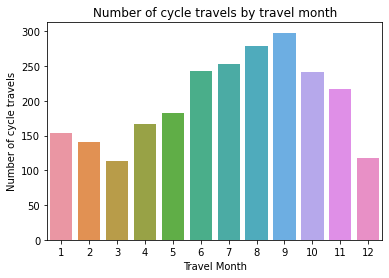

In [9]:
# group the data by the values of the column "travel_month"
grouped_month = df.groupby("travel_month")

# count the number of occurrences of 'cycle' in the column "travel_mode" for each group
cycle_counts = grouped_month["travel_mode"].apply(lambda x: (x == 'cycle').sum())

# print the result
print(cycle_counts)

# plot the result using seaborn
sns.barplot(x=cycle_counts.index, y=cycle_counts.values)
plt.xlabel("Travel Month")
plt.ylabel("Number of cycle travels")
plt.title("Number of cycle travels by travel month")
plt.show()

## b) The day of the week

day_of_week
1    310
2    422
3    398
4    346
5    421
6    265
7    243
Name: travel_mode, dtype: int64


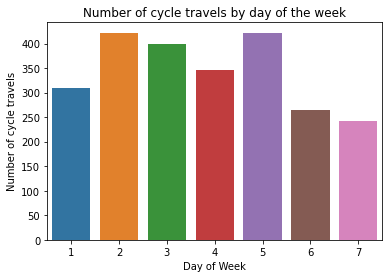

In [10]:
# group the data by the values of the column "day_of_week"
grouped_day = df.groupby("day_of_week")

# count the number of occurrences of 'cycle' in the column "travel_mode" for each group
cycle_counts = grouped_day["travel_mode"].apply(lambda x: (x == 'cycle').sum())

# print the result
print(cycle_counts)

# plot the result using seaborn
sns.barplot(x=cycle_counts.index, y=cycle_counts.values)
plt.xlabel("Day of Week")
plt.ylabel("Number of cycle travels")
plt.title("Number of cycle travels by day of the week")
plt.show()

## 8. What is the proportion of trips where people have chosen the quickest transport mode?

In [11]:
df2 = df.copy()

# Define the columns you want to check the minimum value of
min_columns = ["dur_walking", 'dur_cycling', 'dur_pt_total','dur_driving']

# Find the name of the column with the minimum value in each row
min_column = df2[min_columns].idxmin(axis=1)

In [12]:
# Map the categorical variables in the travel_mode column to the names of the mode columns
df2['travel_mode'] = df2['travel_mode'].map({"walk": "dur_walking", "cycle": 'dur_cycling', "pt":'dur_pt_total',"drive":'dur_driving' })

# Check the portion of the rows where the name of the column with the minimum value matches the categorical value
result = (min_column == df2['travel_mode'])
percentage = (result.sum() / result.shape[0]) * 100

print(percentage)

42.54001923883284


## 9. Investigate three research question

(See in the pdf file)

## 10. Try to divide sample into age categories. Which category has the highest share of public transport?

In [13]:
data1=df.copy()
# Specify the intervals for the trunks
bins = [5, 15, 30, 50, 99]

# Divide the ages into the specified trunks
trunks = pd.cut(data1['age'], bins)

# Add the trunks as a new column to the dataframe
data1['age_trunks'] = trunks

# Display the dataframe
data1

# group the dataframe by the age groups
grouped_age_groups = data1.groupby('age_trunks')

# calculate the proportions of the different values of travel_mode for each truncated dataset
for name, group in grouped_age_groups:
    proportions = group['travel_mode'].value_counts(normalize=True)
    print(f'For age group {name}, the proportions of travel modes are:')
    print(proportions)

For age group (5, 15], the proportions of travel modes are:
drive    0.474994
pt       0.291176
walk     0.215826
cycle    0.018004
Name: travel_mode, dtype: float64
For age group (15, 30], the proportions of travel modes are:
pt       0.486632
drive    0.284487
walk     0.193440
cycle    0.035441
Name: travel_mode, dtype: float64
For age group (30, 50], the proportions of travel modes are:
drive    0.466922
pt       0.327277
walk     0.169204
cycle    0.036597
Name: travel_mode, dtype: float64
For age group (50, 99], the proportions of travel modes are:
drive    0.512089
pt       0.313302
walk     0.153684
cycle    0.020925
Name: travel_mode, dtype: float64


## 11. Calculate the age distribution in the sample 

In [14]:
distribution = data1.filter(["household_id", "person_n", "age_trunks"]).drop_duplicates()
Size = distribution.count()
age_distribution = distribution.groupby(["age_trunks"]).count()
age_distribution/Size*100

,age_trunks,household_id,person_n
age_trunks,,,
"(5, 15]",NaN,12.558678,12.558678
"(15, 30]",NaN,22.864117,22.864117
"(30, 50]",NaN,35.156788,35.156788
"(50, 99]",NaN,28.034049,28.034049


## 12. Calculate the average daily time for each individual for each transport mode 

In [15]:
#data_daily = pd.read_csv(filename)
data_daily = data1
print(data_daily["travel_mode"].unique())


new_columns = ['spent_walking', 'spent_cycling', 'spent_pt_total','spent_driving']
old_columns = ['dur_walking', 'dur_cycling', 'dur_pt_total','dur_driving']
travel_mode = ["walk", "cycle", "pt","drive"]

data_daily['spent_walking'] = data_daily.apply(lambda row: row['dur_walking'] if row['travel_mode'] == "walk" else 0, axis=1)
data_daily['spent_cycling'] = data_daily.apply(lambda row: row['dur_cycling'] if row['travel_mode'] == "cycle" else 0, axis=1)
data_daily['spent_pt_total'] = data_daily.apply(lambda row: row['dur_pt_total'] if row['travel_mode'] == "pt" else 0, axis=1)
data_daily['spent_driving'] = data_daily.apply(lambda row: row['dur_driving'] if row['travel_mode'] == "drive" else 0, axis=1)

    

print(data_daily[["age_trunks"]])

['drive' 'pt' 'walk' 'cycle']
      age_trunks
0       (50, 99]
1       (50, 99]
2       (50, 99]
3       (50, 99]
4       (50, 99]
...          ...
81081   (15, 30]
81082   (15, 30]
81083   (15, 30]
81084   (15, 30]
81085   (15, 30]

[81086 rows x 1 columns]


In [16]:
### Group by individuals and days in case of there are several days for the same individual and then sum the duration of each travel mode. Indeed in the dataframe if a travel mode is not used then the duration is 0.
individuals = data_daily.groupby(["household_id", "person_n",'travel_year', 'travel_month', 'travel_date'])["spent_walking", 'spent_cycling', 'spent_pt_total','spent_driving'].sum()



### After summing just do an average on all the individuals
Average = individuals.mean()
print(Average*60)

spent_walking      7.474930
spent_cycling      1.355171
spent_pt_total    30.272069
spent_driving     16.750983
dtype: float64


c:\Users\dzerz\anaconda3\envs\Python_Intro\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


## Question 13

In [17]:
individuals = data_daily.groupby(["household_id", "person_n"]).agg(
    spent_walking = ("spent_walking", np.sum),
    spent_cycling = ("spent_cycling", np.sum),
    spent_pt_total = ("spent_pt_total", np.sum),
    spent_driving = ("spent_driving", np.sum),
    age_trunks = ("age_trunks", np.min))


### After summing just do an average on all the individuals
Average = individuals.groupby(["age_trunks"]).mean()
print(Average*60)

              spent_walking  spent_cycling  spent_pt_total  spent_driving
age_trunks                                                               
(5.0, 15.0]        7.876348       0.319017       17.899315      13.095569
(15.0, 30.0]       8.588480       1.690216       43.424373      11.729140
(30.0, 50.0]       7.689383       1.933327       32.398709      19.597521
(50.0, 99.0]       6.159894       0.871232       23.356627      18.918990


In [18]:
# Population 

p_15 = 0.13
p_30 = 0.15
p_50 = 0.43
p_99 = 0.29

population = [p_15, p_30, p_50,p_99]

print(Average*60)

Ponderation = Average[["spent_walking", "spent_cycling", "spent_pt_total", "spent_driving" ]].multiply(population,axis=0)

print(Ponderation*60)

Result = Ponderation.sum()*60

print (Result)


              spent_walking  spent_cycling  spent_pt_total  spent_driving
age_trunks                                                               
(5.0, 15.0]        7.876348       0.319017       17.899315      13.095569
(15.0, 30.0]       8.588480       1.690216       43.424373      11.729140
(30.0, 50.0]       7.689383       1.933327       32.398709      19.597521
(50.0, 99.0]       6.159894       0.871232       23.356627      18.918990
              spent_walking  spent_cycling  spent_pt_total  spent_driving
age_trunks                                                               
(5.0, 15.0]        1.023925       0.041472        2.326911       1.702424
(15.0, 30.0]       1.288272       0.253532        6.513656       1.759371
(30.0, 50.0]       3.306435       0.831331       13.931445       8.426934
(50.0, 99.0]       1.786369       0.252657        6.773422       5.486507
spent_walking      7.405001
spent_cycling      1.378993
spent_pt_total    29.545434
spent_driving     17.375236
